In [9]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import operator

from util.api import get_versions_df, get_update_count_df, get_count_updated_packages_by_lts

%matplotlib inline
plt.style.use('classic')

In [10]:
lts_list = ['0-7', '2-22', '3-22', '6-35', '7-24', '9-21', '11-22', '12-14', '12-26', '13-11', '13-19', '14-27', '15-3', '16-11']
df_list = []
df_by_category_list = []

for idx, lts in enumerate(lts_list):
    df = pd.read_pickle(f'../../data/lts-{lts}/lts-{lts}.df')
    df_list.append(df)
    
for idx, lts in enumerate(lts_list):
    df = pd.read_pickle(f'../../data/lts-{lts}/lts-{lts}-by-category.df')
    df_by_category_list.append(df)

# Research Questions (RQs)

- **RQ 1.** What packages are the most used? Which of them are outside from the Stackage selection?
- **RQ 2.** How many dependencies of packages are outside from the Stackage selection (in)directly?
- **RQ 3.** How frequently are the packages updated? 

Regarding monads, we analyze the evolution of dependencies of monad modules available in the mtl package:

- **RQ 4.** How has the use of monads evolved?
- **RQ 5.** Are there packages that stopped using monads?

## RQ 3. How frequently are the packages updated? 

Construimos un nuevo DafaFrame que nos muestra la version de cada paquete en cada LTS que llamamos `versions_df`. Procesamos este DataFrame contando la cantidad de veces en que cada paquete actualizo su version a lo largo del tiempo. Luego, calculamos el porcentaje de paquetes que actualizo su version en cada LTS respecto a la cantidad de paquetes totales en el snapshot anterior.

- La primera version tiene alrededor de 800 paquetes y el porcentaje de actualizacion depende de la version anterior
- Al inicio de las versiones se actualizaron una gran cantidad de paquetes entre cada snapshot (2-22, 3-22 y 6-35), sin embargo el periodo de tiempo (+6 meses) existente entre estas versiones es superior, ya que no existia regularidad en la publicacion de versiones
- Durante las versiones 12-14, 12-26, 13-11 y 13-19 se ve una disminucion en la cantidad de paquetes actualziados sin emargo el margen de tiempo (1-3 meses) entre estas versiones es bastante menor a las otras publicacinoes.
- En promedio se actializan el 28% de los paquetes y la desviacion estandar X

In [11]:
versions_df = get_versions_df(df_list)

In [12]:
update_count_df = get_update_count_df(df_list, versions_df)

In [13]:
count_updated_packages_by_lts = get_count_updated_packages_by_lts(df_list, update_count_df)

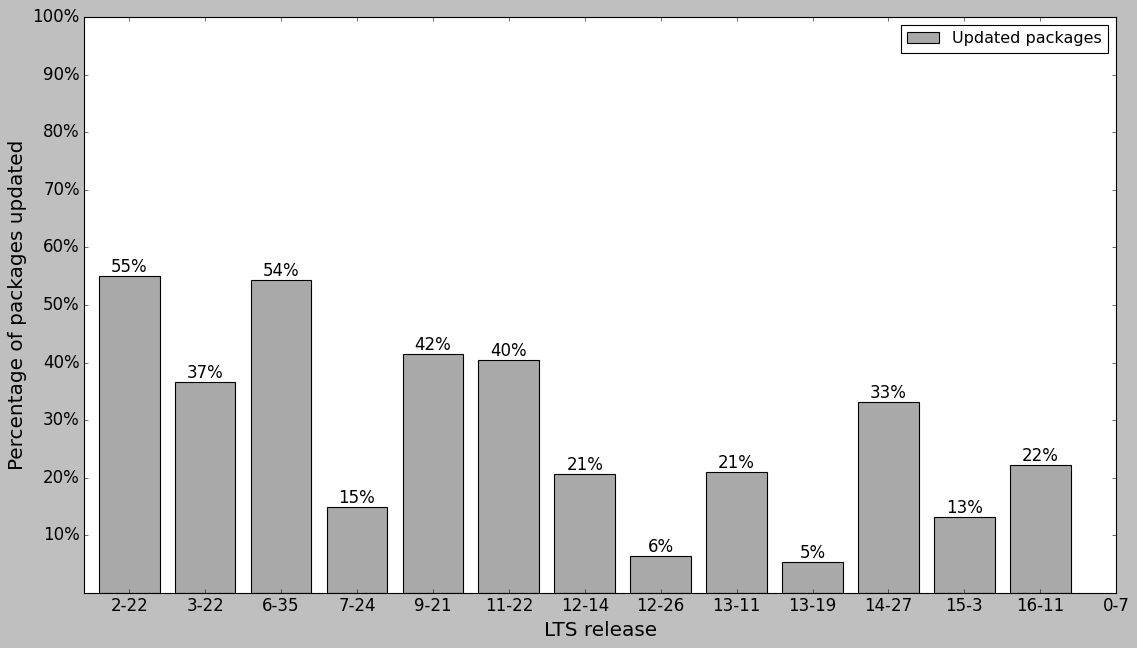

In [14]:
index = list(count_updated_packages_by_lts.keys())
updated_packages = list(count_updated_packages_by_lts.values())

fig, ax = plt.subplots(figsize=(12,8))
ax.margins(0.015) 
plt.subplots_adjust(bottom=0.1, right=1.2, top=1)

bar1 = ax.bar(index, updated_packages, width=0.8, color='darkgrey', align='center', label='Updated packages')
ax.bar_label(bar1, labels=list(map(lambda per: f"{round(per)}%", updated_packages)),fontsize=15)

ax.legend(loc='best')
ax.set_xlabel('LTS release',fontsize=18)
ax.set_ylabel('Percentage of packages updated',fontsize=18)
ax.set_xticks(lts_list)
ax.set_xticklabels(lts_list,fontsize=15)
ax.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax.set_yticklabels(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'],fontsize=15)
plt.savefig("../../graphs/rq3.pdf", format='pdf', bbox_inches='tight')
plt.show()